## Step 1. Ïä§Ìã∞Ïª§ Íµ¨ÌïòÍ∏∞ or ÎßåÎì§Í∏∞

In [1]:
import os
import cv2
import matplotlib.pyplot as plt 
import numpy as np
import dlib
print("üíû")

üíû


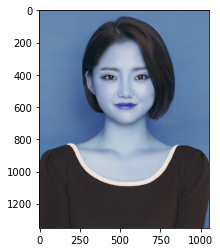

In [2]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_project/colour.jpg'
img_bgr = cv2.imread(my_image_path)    
img_show = img_bgr.copy()    
plt.imshow(img_bgr)
plt.show()

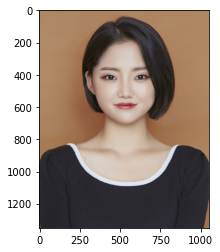

In [3]:
#ÏÉâÍπî Î≥¥Ï†ïÏ≤òÎ¶¨

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

## Step 2. ÏñºÍµ¥ Í≤ÄÏ∂ú & ÎûúÎìúÎßàÌÅ¨ Í≤ÄÏ∂ú ÌïòÍ∏∞

In [4]:
# detectorÎ•º ÏÑ†Ïñ∏Ìï©ÎãàÎã§

detector_hog = dlib.get_frontal_face_detector()
print("üå´üõ∏")

üå´üõ∏


In [5]:
# detector_hogÎ•º Ïù¥Ïö©Ìï¥ÏÑú ÏñºÍµ¥Ïùò bounding boxÎ•º Ï∂îÏ∂úÌï©ÎãàÎã§.

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)
print("üå´üõ∏")

üå´üõ∏


rectangles[[(332, 290) (718, 675)]]


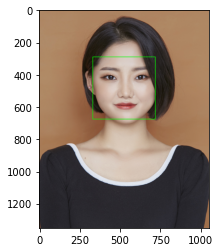

In [6]:
print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

## Step 3. Ïä§Ìã∞Ïª§ Ï†ÅÏö© ÏúÑÏπò ÌôïÏù∏ÌïòÍ∏∞

In [7]:
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
print("üå´üõ∏")

üå´üõ∏


In [8]:
list_landmarks = []

# ÏñºÍµ¥ ÏòÅÏó≠ Î∞ïÏä§ ÎßàÎã§ face landmarkÎ•º Ï∞æÏïÑÎÉÖÎãàÎã§
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    # face landmark Ï¢åÌëúÎ•º Ï†ÄÏû•Ìï¥Îë°ÎãàÎã§
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


ÎûúÎìúÎßàÌÅ¨Ïùò Í∞ØÏàòÎäî 68Í∞ú

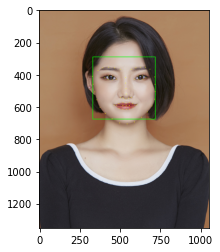

In [9]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

ÎûúÎìúÎßàÌÅ¨ ÌëúÏãúÍ∞Ä ÏûëÏïÑÏÑú Ïûò ÏïàÎ≥¥Ïù¥ÏßÄÎßå...!
ÏûêÏÑ∏Ìûà Îì§Ïó¨Îã§ Î≥¥Î©¥ ÎûúÎìúÎßàÌÅ¨ ÌëúÏãúÍ∞Ä ÏûàÎãµÎãàÎã§.

## Step 4. Ïä§Ìã∞Ïª§ Ï†ÅÏö©ÌïòÍ∏∞

(1) Ïò§Îäò Î∞∞Ïö¥ np.where Î•º ÏÇ¨Ïö©Ìï¥ÏÑú Ïä§Ìã∞Ïª§Î•º Ï†ÅÏö©Ìï¥ Ï£ºÏÑ∏Ïöî.

(2) Ïä§Ìã∞Ïª§Î•º Ï°∞Í∏à Îçî ÏûêÏó∞Ïä§ÎüΩÍ≤å Î≥¥Ïù¥Í≤å ÌïòÎ†§Î©¥ Ïñ¥ÎñªÍ≤å Ìï¥Ïïº Ìï†ÍπåÏöî? Ïä§Ìã∞Ïª§ Îí§Î°ú ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄÍ∞Ä Í∞ôÏù¥ Î≥¥Ïù¥ÎèÑÎ°ù ÎßåÎì§Ïñ¥ Î¥ÖÏãúÎã§. opencv Ïùò cv2.addWeighted() Î•º Ï∞∏Í≥†ÌïòÏÑ∏Ïöî.

In [10]:
# Ï¢åÌëú ÌôïÏù∏
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) 
    x = landmark[30][0]
    y = landmark[30][1] - dlib_rect.height() //2
    w = h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))


(538, 520)
(x,y) : (538,327)
(w,h) : (387,387)


In [11]:
refined_x = x - w // 2
refined_y = y
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (345,327)


In [12]:
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/sticker/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path) # Ïä§Ìã∞Ïª§ Ïù¥ÎØ∏ÏßÄÎ•º Î∂àÎü¨ÏòµÎãàÎã§
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

(387, 387, 3)


y Í∞íÏù¥ ÏùåÏàòÍ∞Ä ÎÇòÏò® Ïù¥Ïú†Îäî? Ïä§Ìã∞Ïª§Ïùò ÏãúÏûëÏ†êÏù¥ ÏñºÍµ¥ ÏÇ¨ÏßÑ ÏòÅÏó≠ÏùÑ Î≤óÏñ¥ÎÇ¨Í∏∞ ÎïåÎ¨∏Ïù¥Îã§!
ÏùåÏàòÏóê ÎåÄÌïú ÏòàÏô∏Ï≤òÎ¶¨Í∞Ä ÌïÑÏöîÌï®. ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄÏùò Î≤îÏúÑÎ•º Î≤óÏñ¥ÎÇú Ïä§Ìã∞Ïª§ Î∂ÄÎ∂ÑÏùÄ Ï†úÍ±∞Ìï¥Ï§òÏïºÌïúÎã§

In [13]:
if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (345,327)


In [14]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
print("Ïäù~")

Ïäù~


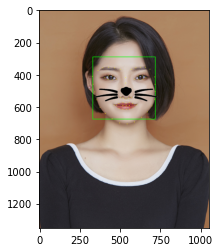

In [15]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

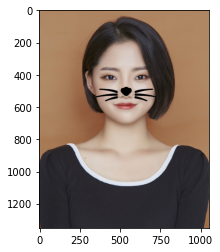

In [16]:
# bounding boxÏôÄ landmarkÎ•º Ï†úÍ±∞ÌïòÍ≥† ÏµúÏ¢ÖÍ≤∞Í≥ºÎßå Ï∂úÎ†•ÌïòÍ∏∞

sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

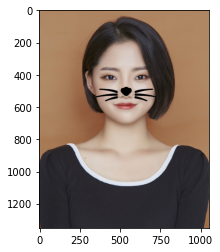

In [17]:
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

## Step 5. Î¨∏Ï†úÏ†ê Ï∞æÏïÑÎ≥¥Í∏∞
(1) ÏÖÄÌîÑ Ïπ¥Î©îÎùºÎ•º Îã§ÏñëÌïú Í∞ÅÎèÑÏóêÏÑú Ï¥¨ÏòÅÌïòÎ©¥ÏÑú Ïä§Ìã∞Ïª§Î•º Î∞òÎ≥µÌï¥ÏÑú Ï†ÅÏö©Ìï¥ Î≥¥ÏÑ∏Ïöî.

(2) Î¨∏Ï†úÏ†êÏù¥ Î¨¥ÏóáÏù∏ÏßÄ ÏµúÎåÄÌïú ÏûêÏÑ∏ÌïòÍ≤å Í∏∞Î°ùÌï¥ Î≥¥ÏÑ∏Ïöî. Ïó¨Îü¨Î∂ÑÏù¥ ÏÉùÍ∞ÅÌïú Î¨∏Ï†úÏ†êÏùÑ Ìï¥Í≤∞ÌïòÍ∏∞ ÏúÑÌïú Î∞©Î≤ïÏùÄ Î∂ÑÎ™Ö Ï°¥Ïû¨Ìï©ÎãàÎã§!

# ÏòÜÏóêÏÑú Ï∞çÏùÄ ÏÇ¨ÏßÑÏóê Ï†ÅÏö©Ìï¥Î≥¥Í∏∞

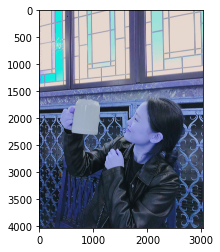

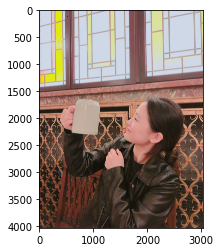

In [18]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_project/aaa.jpg'
img_bgr = cv2.imread(my_image_path)    
img_show = img_bgr.copy()    
plt.imshow(img_bgr)
plt.show()


#ÏÉâÍπî Î≥¥Ï†ïÏ≤òÎ¶¨

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

In [19]:
# detectorÎ•º ÏÑ†Ïñ∏Ìï©ÎãàÎã§

detector_hog = dlib.get_frontal_face_detector()
print("üå´üõ∏")


üå´üõ∏


üå´üõ∏
rectangles[]


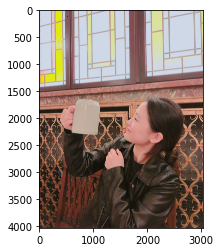

In [20]:
# detector_hogÎ•º Ïù¥Ïö©Ìï¥ÏÑú ÏñºÍµ¥Ïùò bounding boxÎ•º Ï∂îÏ∂úÌï©ÎãàÎã§.

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)
print("üå´üõ∏")


print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

### ÏòÜÏúºÎ°ú Ï∞çÏùÄ ÏÇ¨ÏßÑÏùÄ ÏñºÍµ¥Ïùò bounding boxÎ•º Ï∂îÏ∂úÌïòÎäî Íµ¨Í∞ÑÎ∂ÄÌÑ∞ Î¨∏Ï†úÍ∞Ä Î∞úÏÉùÌïúÎã§. 

### Ï¢ÖÎ£å

# ÏñºÍµ¥Ïù¥ Îã§ ÎÇòÏò® Ï∏°Î©¥ + ÏÜåÌíà

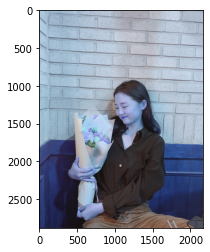

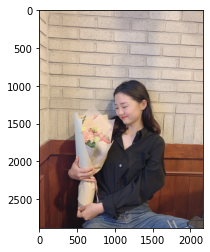

üå´üõ∏


In [21]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_project/bbb.jpg'
img_bgr = cv2.imread(my_image_path)    
img_show = img_bgr.copy()    
plt.imshow(img_bgr)
plt.show()


#ÏÉâÍπî Î≥¥Ï†ïÏ≤òÎ¶¨

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()


# detectorÎ•º ÏÑ†Ïñ∏Ìï©ÎãàÎã§

detector_hog = dlib.get_frontal_face_detector()
print("üå´üõ∏")


üå´üõ∏
rectangles[[(954, 1169) (1275, 1490)], [(502, 1530) (964, 1992)]]


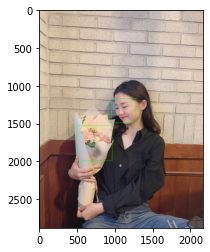

In [22]:
# detector_hogÎ•º Ïù¥Ïö©Ìï¥ÏÑú ÏñºÍµ¥Ïùò bounding boxÎ•º Ï∂îÏ∂úÌï©ÎãàÎã§.

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)
print("üå´üõ∏")


print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

### ÏôÑÏ†ÑÌûà ÏñºÍµ¥Ïùò Ï∏°Î©¥Îßå Î≥¥ÏòÄÎçò Ï≤´Î≤àÏß∏ ÏÇ¨ÏßÑÍ≥ºÎäî Îã¨Î¶¨, Ïù¥Î™©Íµ¨ÎπÑÍ∞Ä Îã§ Î≥¥Ïù¥Îäî Ïù¥Î≤à ÏÇ¨ÏßÑÏùò Í≤ΩÏö∞ÏóêÎäî bounding boxÍ∞Ä Ï∂îÏ∂úÎêòÏóàÎã§. ÌïòÏßÄÎßå, ÍΩÉÎã§Î∞úÏùÑ ÏñºÍµ¥Î°ú Ïù∏ÏãùÌñàÎäîÏßÄ ÍΩÉÎã§Î∞úÏóêÏÑúÎèÑ bounding boxÍ∞Ä Ï∂îÏ∂úÎêòÏóàÎã§...

rectangles[[(954, 1169) (1275, 1490)], [(502, 1530) (964, 1992)]]


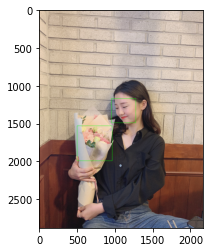

In [23]:
print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

### Îëê Í∞úÏùò boxÍ∞Ä ÌòïÏÑ±ÎêòÏóàÍ∏∞ ÎïåÎ¨∏Ïóê rectanglesÏùò Í∞íÎèÑ Îëê Í∞úÍ∞Ä ÎÇòÏôîÎã§. 

In [24]:
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
print("üå´üõ∏")

üå´üõ∏


In [25]:
list_landmarks = []

# ÏñºÍµ¥ ÏòÅÏó≠ Î∞ïÏä§ ÎßàÎã§ face landmarkÎ•º Ï∞æÏïÑÎÉÖÎãàÎã§
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    # face landmark Ï¢åÌëúÎ•º Ï†ÄÏû•Ìï¥Îë°ÎãàÎã§
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


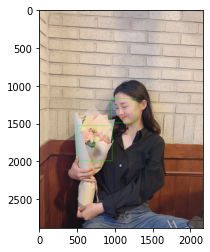

In [26]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

ÏÇ¨ÏßÑ ÏÜçÏùò ÏñºÍµ¥Ïù¥ ÎÑà~Î¨¥ ÏûëÏùÄ ÌÉìÏóê ÎûúÎìúÎßàÌÅ¨Î•º ÌôïÏù∏ÌïòÍ∏∞ Ïñ¥Î†µÎã§...
ÍΩÉÎã§Î∞úÎèÑ...

### Ï¢åÌëú ÌôïÏù∏

In [27]:
# Ï¢åÌëú ÌôïÏù∏
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) 
    x = landmark[30][0]
    y = landmark[30][1] - dlib_rect.height() //2
    w = h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))


(1057, 1369)
(x,y) : (1057,1208)
(w,h) : (322,322)
(762, 1756)
(x,y) : (762,1525)
(w,h) : (463,463)


 Îëê Í∞úÏùò Î∞ïÏä§Ïóê Í∞ÅÍ∞Å Ïä§Ìã∞Ïª§Î•º Ï†ÅÏö©Ìï¥ÏïºÌïòÎäî ÏÉÅÌô©Ïù¥ Î∞úÏÉùÌñàÎã§. 
 

# ÏÑ†Í∏ÄÎùºÏä§+ ÎßàÏä§ÌÅ¨

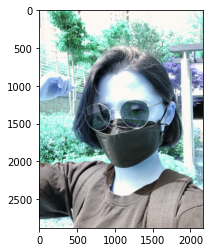

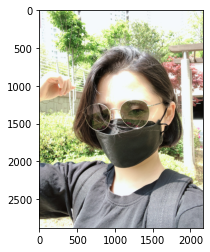

In [28]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_project/sunglasses.jpg'
img_bgr = cv2.imread(my_image_path)    
img_show = img_bgr.copy()    
plt.imshow(img_bgr)
plt.show()

#ÏÉâÍπî Î≥¥Ï†ïÏ≤òÎ¶¨

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()



üå´üõ∏
üå´üõ∏
rectangles[[(617, 937) (1575, 1895)]]


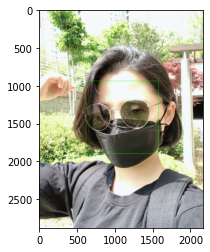

In [29]:
# detectorÎ•º ÏÑ†Ïñ∏Ìï©ÎãàÎã§

detector_hog = dlib.get_frontal_face_detector()
print("üå´üõ∏")


# detector_hogÎ•º Ïù¥Ïö©Ìï¥ÏÑú ÏñºÍµ¥Ïùò bounding boxÎ•º Ï∂îÏ∂úÌï©ÎãàÎã§.

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)
print("üå´üõ∏")


print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

ÏòàÏÉÅ Ïô∏Î°ú ÎßàÏä§ÌÅ¨Ïóê ÏÑ†Í∏ÄÎùºÏä§Î•º Ï∞©Ïö©ÌñàÎäîÎç∞ÎèÑ bounding boxÎ•º Ï∂îÏ∂úÌñàÎã§. 
ÏôúÏùºÍπå..?

In [30]:
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
print("üå´üõ∏")

üå´üõ∏


In [31]:
list_landmarks = []

# ÏñºÍµ¥ ÏòÅÏó≠ Î∞ïÏä§ ÎßàÎã§ face landmarkÎ•º Ï∞æÏïÑÎÉÖÎãàÎã§
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    # face landmark Ï¢åÌëúÎ•º Ï†ÄÏû•Ìï¥Îë°ÎãàÎã§
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


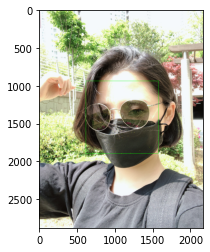

In [32]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [33]:
# Ï¢åÌëú ÌôïÏù∏
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[33]) 
    x = landmark[33][0]
    y = landmark[33][1] - dlib_rect.height() //2
    w = h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))


(1033, 1535)
(x,y) : (1033,1056)
(w,h) : (959,959)


In [34]:
refined_x = x - w // 2
refined_y = y + 100
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (554,1156)


In [35]:
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/sticker/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path) # Ïä§Ìã∞Ïª§ Ïù¥ÎØ∏ÏßÄÎ•º Î∂àÎü¨ÏòµÎãàÎã§
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

(959, 959, 3)


In [36]:
if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (554,1156)


In [37]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
print("Ïäù~")

Ïäù~


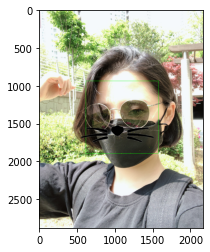

In [38]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

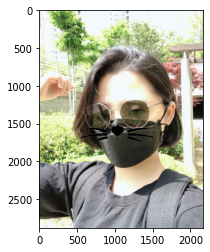

In [39]:
# bounding boxÏôÄ landmarkÎ•º Ï†úÍ±∞ÌïòÍ≥† ÏµúÏ¢ÖÍ≤∞Í≥ºÎßå Ï∂úÎ†•ÌïòÍ∏∞

sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

### Í≤∞Í≥º : ? ÏùòÏô∏Î°ú ÏÑ†Í∏ÄÎùºÏä§ÏôÄ ÎßàÏä§ÌÅ¨Î•º Ï∞©Ïö©Ìïú ÏÉÅÌÉúÏóêÏÑú ÏñºÍµ¥ÏùÑ Ïù∏ÏãùÌïòÍ≥† Ïä§Ìã∞Ïª§Î•º Î∂ÄÏ∞©Ìï† Ïàò ÏûàÏóàÎã§. 

## Ïò§Îäò ÎßåÎì† Ïä§Ìã∞Ïª§Ïï±ÏóêÏÑú ÏÉùÍ∞ÅÌï¥Î≥º Ïàò ÏûàÎäî Î¨∏Ï†úÏ†êÏùÄ Îã§ÏùåÍ≥º Í∞ôÏäµÎãàÎã§.

- ÏñºÍµ¥ Í∞ÅÎèÑÏóê Îî∞Îùº Ïä§Ìã∞Ïª§Í∞Ä Ïñ¥ÎñªÍ≤å Î≥ÄÌï¥ÏïºÌï†ÍπåÏöî?
- Î©ÄÎ¶¨ÏÑú Ï¥¨ÏòÅÌïòÎ©¥ Ïôú ÏïàÎê†ÍπåÏöî? ÏòÜÏúºÎ°ú ÎàÑÏõåÏÑú Ï¥¨ÏòÅÌïòÎ©¥ Ïôú ÏïàÎê†ÍπåÏöî?
- Ïã§Ìñâ ÏÜçÎèÑÍ∞Ä Ï§ëÏöîÌï†ÍπåÏöî?
- Ïä§Ìã∞Ïª§Ïï±ÏùÑ ÎßåÎì§ Îïå Ï†ïÌôïÎèÑÍ∞Ä ÏñºÎßàÎÇò Ï§ëÏöîÌï†ÍπåÏöî?

## ÌöåÍ≥† 

1. Í≥†ÏñëÏù¥ ÏàòÏóº Ïä§Ìã∞Ïª§ ÏúÑÏπòÎ•º Ïù¥ÎèôÏãúÌÇ§Îäî Íµ¨Í∞ÑÏù¥ ÎÑàÎ¨¥ Î≥µÏû°ÌïòÍ≥† Ïñ¥Î†§Ïõ†Îã§. ÌäπÌûà Íµ¨Í∏ÄÎßÅÏùÑ Ìï¥ÎèÑ Ïù¥ Î∂ÄÎ∂ÑÏóê ÎåÄÌïú ÏÑ§Î™ÖÏùÑ ÏâΩÍ≤å Ï∞æÏùÑ Ïàò ÏóÜÏóàÎã§. Îã§ÌñâÌûà Îã§Î•∏ ÏïÑÏù¥Ìé† ÍµêÏú°ÏÉùÎ∂ÑÍªò ÎèÑÏõÄÏùÑ ÏñªÏùÑ Ïàò ÏûàÏóàÎã§.
 +) xÍ∞íÏùÄ ÏΩîÎ•º Í∏∞Ï§ÄÏúºÎ°ú Ï†ÅÏ†àÌïú ÏúÑÏπòÏóê ÏûàÏóàÏßÄÎßå, yÍ∞íÏùÄ ÏúÑÏπòÌï¥ÏïºÌï† ÏΩîÎ≥¥Îã§ Îçî ÎÜíÏùÄ Í≥≥Ïóê ÏûàÏóàÎã§. Ìï¥Îãπ  y Í∞íÏóêÏÑú ÏùåÏàòÍ∞Ä ÎêòÎ©¥ ÏúÑÏπòÍ∞Ä ÎçîÏö± ÏúÑÎ°ú Í∞ÄÍ≥†, Îçî ÎÜíÏùÄ ÏñëÏàòÍ∞íÏùÑ Í∞ñÍ≤å ÎêòÎ©¥ ÏúÑÏπòÍ∞Ä ÏïÑÎûòÎ°ú ÎÇ¥Î†§Í∞ÑÎã§. Ï†ÅÏ†àÌïú Ïà´ÏûêÎ•º Ïó¨Îü¨ Î≤à ÎçîÌï¥ Î≥∏ Í≤∞Í≥º, ÏΩîÏóê ÏúÑÏπòÌï† Ïàò ÏûàÏóàÎã§. 



2. 'ÏÑ†Í∏ÄÎùºÏä§&ÎßàÏä§ÌÅ¨'Îäî ÏñºÍµ¥Ïù¥ Ï∂îÏ∂úÎêòÏóàÏßÄÎßå, 'ÏñºÍµ¥Ïùò ÏùºÎ∂ÄÎßå ÎÇòÏò® Ï∏°Î©¥ÏÇ¨ÏßÑ'ÏóêÏÑúÎäî Ï∂îÏ∂úÏù¥ ÎêòÏßÄ ÏïäÏïòÎã§. Î∞òÌà¨Î™ÖÌïú ÏÑ†Í∏ÄÎùºÏä§Î•º ÌÜµÌï¥ÏÑú ÏñºÍµ¥ÏùÑ Ïù∏ÏãùÌïú Í≤É Í∞ôÎã§. Ïù¥ Î∂ÄÎ∂ÑÏùÑ ÌÜµÌï¥ÏÑú ÏñºÍµ¥ Ïô∏Í≥ΩÏÑ†Í≥º ÎààÏù¥ Ï§ëÏöîÌïòÎã§Í≥† ÏÉùÍ∞ÅÎêòÏóàÎã§.ÏÑ†Í∏ÄÎùºÏä§ÏôÄ ÎßàÏä§ÌÅ¨Îäî ÎßéÏù¥ Í∞ÄÎ†§Ï†∏ ÏûàÍ∏∞ ÎïåÎ¨∏Ïóê Ïù∏ÏãùÌïòÍ∏∞ ÌûòÎì§ 



3. ÏñºÍµ¥ Í∞ÅÎèÑÏóê Îî∞ÎùºÏÑú Ïä§Ìã∞Ïª§ ÎòêÌïú Í∏∞Ïö∏Ïñ¥ÏßÑ Î™®ÏñëÏúºÎ°ú Î∞îÍøîÏïº Ìï† Í≤ÉÏù¥Îã§.



4. Î©ÄÎ¶¨ÏÑú Ï¥¨ÏòÅÌïòÍ±∞ÎÇò ÏòÜÏúºÎ°ú ÎàÑÏõåÏÑú Ï¥¨ÏòÅÌïòÎ©¥ Î∞úÏÉùÌï† Ïàò ÏûàÎäî Î¨∏Ï†ú? 
- Î©ÄÎ¶¨ÏÑú Ï¥¨ÏòÅÌïú ÏÇ¨ÏßÑÏùÄ ÎûúÎìúÎßàÌÅ¨Í∞Ä ÎÑàÎ¨¥ ÏûëÍ≤å Î≥¥Ïù¥Í∏∞ÎèÑ ÌïòÍ≥† ÌôîÏßàÏù¥ Ï¢ãÏßÄ ÏïäÎã§Î©¥, 68Í∞úÏùò ÎûúÎìúÎßàÌÅ¨Í∞Ä Í∞ÅÍ∞Å Îã§Î•∏ Ï¢åÌëúÏóê ÏúÑÏπòÌï† Ïàò ÏóÜÏùÑ Í≤ÉÏù¥Îã§. Ï§ëÎ≥µÎêòÎäî Íµ¨Í∞ÑÏù¥ Î∞úÏÉùÌï† Í≤ÉÏù¥ÎùºÍ≥† ÏòàÏÉÅÎêúÎã§. 
- ÏòÜÏúºÎ°ú ÎàÑÏõåÏÑú Ï¥¨ÏòÅÌïúÎã§Î©¥? 
 (1) ÏñºÍµ¥Ïùò ÌòïÌÉúÏôÄ Ïù¥Î™©Íµ¨ÎπÑ(ÌäπÌûà Îàà)Ïù¥ Î≥¥Ïù¥Îäî Í≤ΩÏö∞Îäî Ïù∏ÏãùÏù¥ Îê† Í≤ÉÏù¥Îã§.
 (2) ÏúÑÏùò Ìï≠Î™©Îì§ Ï§ë Ïù¥Î™©Íµ¨ÎπÑÏùò ÏùºÎ∂ÄÍ∞Ä Î≥¥Ïù¥ÏßÄ ÏïäÍ±∞ÎÇò ÏñºÍµ¥ Ïô∏ÌòïÏùÑ Ïù∏ÏãùÌï† Ïàò ÏóÜÎã§Î©¥  bounding boxÏùò ÌòïÏÑ±Ïù¥ ÏïàÎê† Í≤ÉÏù¥Îã§.


5. ÎåÄÎ∂ÄÎ∂ÑÏùò ÏÇ¨ÏßÑ Ïï±ÏùÑ ÏÇ¨Ïö©Ìï† Îïå, ÏÇ¨Ïö©ÏûêÍ∞Ä Ï¶ùÎ™ÖÏÇ¨ÏßÑÏùÑ Ï∞çÎäî Í≤ÉÏ≤òÎüº Í∞ÄÎßåÌûà ÏûàÎäî Í≤ΩÏö∞Í∞Ä ÏóÜÎã§. ÏñºÍµ¥ÏùÑ Í≥ÑÏÜç ÏõÄÏßÅÏù¥Í∏∞ ÎïåÎ¨∏Ïóê Í∑∏ ÏÜçÎèÑÏóê ÎßûÏ∂∞ÏÑú Í∞ÅÎèÑÎÇò ÌÅ¨Í∏∞Î•º Ï°∞Ï†àÌï† Ïàò ÏûàÏñ¥Ïïº ÌïúÎã§. Í∑∏Î†áÏßÄ ÏïäÏúºÎ©¥... ÏÇ¨Ïö©ÏûêÍ∞Ä ÏóÜÏùÑ Í≤ÉÏù¥Îã§.  

6. Ïä§Ìã∞Ïª§ Ïï±ÏùÑ ÎßåÎì§ Îïå Ï†ïÌôïÎèÑÎäî 90% Ïù¥ÏÉÅÏù¥ ÎêòÏñ¥Ïïº ÌïòÏßÄ ÏïäÏùÑÍπå? 
Ïä§Ìã∞Ïª§Ïùò ÏÜçÎèÑÍ∞Ä Ïñ¥Îäê Ï†ïÎèÑ ÎäêÎ¶¨Í±∞ÎÇò ÌôîÏßàÏù¥ ÎÇòÏÅú Í≤ÉÏùÄ ÏÇ¨ÎûåÎì§Ïù¥ Ïù¥Ìï¥Ìï† Ïàò ÏûàÍ≤†ÏßÄÎßå, ÏÇ¨ÏßÑÏùÑ Íæ∏ÎØ∏Í∏∞ ÏúÑÌï¥ÏÑú Ï†ÅÏ†àÌïú ÏúÑÏπòÏóê Ïä§Ìã∞Ïª§Í∞Ä ÏûêÎ¶¨Ïû°ÏïÑÏïº ÌïòÍ∏∞ ÎïåÎ¨∏Ïóê, Ï†ïÌôïÎèÑÍ∞Ä Ï§ëÏöîÌïòÎã§Í≥† ÏÉùÍ∞ÅÌïúÎã§. 


7. Î£®Î∏åÎ¶≠ ÌèâÍ∞Ä ÏßÄÌëúÎ•º ÎßûÏ∂îÍ∏∞ ÏúÑÌï¥ÏÑú Îã§ÏñëÌïú ÏÇ¨ÏßÑÏùÑ Ïù¥Ïö©ÌñàÎã§. 
- Íµ¨ÏÉÅ Ï†ÑÏóê Îã§ÏñëÌïú Ï¢ÖÎ•òÏùò ÏÇ¨ÏßÑÏùÑ Ï∞æÏúºÎ©¥ÏÑú, 'ÏÑ†Í∏ÄÎùºÏä§&ÎßàÏä§ÌÅ¨'Ïùò ÏÇ¨ÏßÑÏùÄ Ïù∏ÏãùÌïòÏßÄ Î™ªÌïòÏßÄÎßå, 'ÏïàÍ≤Ω'ÏùÄ Ïù∏ÏãùÌï† Ïàò ÏûàÏùÑ Í≤ÉÏù¥ÎùºÎäî ÏÉùÍ∞ÅÏùÑ ÌïòÍ≥† Ï§ÄÎπÑÌñàÎã§. ÌïòÏßÄÎßå ÏòàÏÉÅ Î∞ñÏúºÎ°ú ÏÑ†Í∏ÄÎùºÏä§ÏôÄ ÎßàÏä§ÌÅ¨Î•º Ï∞©Ïö©Ìïú ÏÇ¨ÏßÑÏóêÏÑú bounding boxÍ∞Ä ÌòïÏÑ±ÎêòÏñ¥ Ïä§Ìã∞Ïª§Î•º Î∂ÄÏ∞©Ìï† Ïàò ÏûàÍ≤å ÎêòÎ©¥ÏÑú landmarkÎ•º Ïû°Í≥†, bounding boxÎ•º ÌòïÏÑ±ÌïòÎäîÎç∞ Í∞ÄÏû• Ï§ëÏöîÌïú ÏöîÏù∏Ïù¥ Î¨¥ÏóáÏùº ÏßÄ ÏùòÎ¨∏Ïù¥ Îì§ÏóàÎã§. 
- ÍΩÉÎã§Î∞úÍ≥º Ìï®Íªò ÏûàÎäî ÏÇ¨ÏßÑÏùÄ ÍΩÉÎã§Î∞úÏù¥ Ïù∏ÏãùÎê† Í≤ÉÏù¥ÎùºÎäî ÏÉùÍ∞ÅÏùÑ Ï†ÑÌòÄ Î™ªÌñàÎã§... Í∞ÄÎÅî Ïä§Ìã∞Ïª§ Ïï±ÏùÑ ÏÇ¨Ïö©Ìï† Îïå, ÏÇ¨ÎûåÏùò Ïù¥Î™©Íµ¨ÎπÑÏôÄ ÎãÆÏùÄ Ïù∏ÌòïÏù¥ÎÇò Ï°∞ÌòïÎ¨ºÏùÑ ÏÇ¨ÎûåÏùò ÏñºÍµ¥Î°ú Ïù∏ÏãùÌïòÎäî Í≤ΩÏö∞Îäî Î≥¥ÏïòÎã§. ÌïòÏßÄÎßå, ÍΩÉÎã§Î∞úÏùÄ ÏòàÏÉÅÌïòÏßÄ Î™ªÌñàÎçò Ïû•Ïï†Î¨ºÏù¥ÏóàÎã§. Ïñ¥ÎñªÍ≤å Ìï¥Ïïº ÍΩÉÎã§Î∞úÏùÑ ÏÇ¨ÎûåÏùò ÏñºÍµ¥Î°ú Ïù∏ÏãùÌïòÏßÄ Î™ªÌïòÍ≤å Ìï† Ïàò ÏûàÏùÑÍπå? ÏïÑÎãàÎ©¥ Ïó¨Îü¨ bounding boxÍ∞Ä ÏÉùÍ∏¥ ÌõÑÏóê Îòê ÌïúÎ≤àÏùò landmark Í≥ºÏ†ïÏúºÎ°ú ÏßÑÏßú ÏñºÍµ¥ÏùÑ Îã§Ïãú Ï∞æÍ≤å Ìï¥ÏïºÌï†Íπå?

8. ÏúÑÏùò ÍΩÉÎã§Î∞ú&ÏñºÍµ¥Ïù¥ ÏûàÎäî ÏÇ¨ÏßÑÏùò Í≤ΩÏö∞, (x,y)Î•º (x1,y1)ÏôÄ (x2,y2)Î°ú ÎÇòÎàÑÏñ¥ÏÑú ÏÇ¨ÎûåÏùò ÏñºÍµ¥ÏóêÎßå Ïä§Ìã∞Ïª§Î•º Î∂ÄÏ∞©ÌïòÎäî Î∞©Î≤ïÏùÑ ÏãúÎèÑÌï¥Î≥¥Í≥† Ïã∂ÏóàÏúºÎÇò, Îã§ÏùåÏúºÎ°ú ÎØ∏Î£®Í≤å ÎêòÏóàÎã§. ÎßåÏïΩ Í∑∏Î†áÍ≤å ÌïúÎã§Î©¥ 7Î≤àÏóêÏÑúÏùò ÏùòÎ¨∏Ïù¥ Ìï¥Í≤∞ÎêòÏñ¥Ïïº Ìï† Í≤É Í∞ôÎã§...

9. Ìè¨Í∏∞ÌïòÏßÄ ÏïäÍ≥† ÎÅùÍπåÏßÄ ÏôÑÏàòÌïòÎäîÍ≤å Ï§ëÏöîÌïòÎã§Îäî ÏÉùÍ∞ÅÏù¥ Îì§ÏóàÎã§. Îã§Î•∏ ÏÇ¨ÎûåÎì§Í≥ºÏùò ÌòëÏóÖÏùÑ ÌÜµÌï¥ÏÑú ÎçîÏö± ÏõêÌôúÌïòÍ≤å Í≥µÎ∂ÄÎ•º Ìï† Ïàò ÏûàÏóàÎã§. ÎÇ¥Í∞Ä ÏïÑÎäî Í≤ÉÏù¥ Í±∞Ïùò ÏóÜÍ∏∞ ÎïåÎ¨∏Ïóê lmsÏóêÏÑú ÎÇòÏò§Îäî Î™®Îì† Îã®Ïñ¥ÏôÄ Ïà´Ïûê, ÎÇ¥Ïö©Ïóê ÏßëÏ∞©ÌïòÎã§Î≥¥Îãà ÏßÑÎèÑÎäî Î∞ÄÎ¶¨Í≥† Ìù•ÎØ∏ÏôÄ ÏûêÏã†Í∞êÏùÑ ÏûÉÍ≥† ÏûàÏóàÎã§. Ï°∞Í∏àÎßå Îçî Íµ¨Í∏ÄÎßÅÏùÑ ÌïòÎ©¥ ÎÇ¥Í∞Ä Ï∞æÏïÑÎÇº Ïàò ÏûàÏùÑ Í±∞ÎùºÎäî ÏÉùÍ∞ÅÏóê ÌåÄÏõêÎì§ÏóêÍ≤å ÏßàÎ¨∏ÌïòÍ∏∞ Ïñ¥Î†§Ïõ†Îã§. ÌïòÏßÄÎßå Ïò§Îäò Ïö©Í∏∞ÎÇ¥Ïñ¥ ÏßàÎ¨∏ÏùÑ ÌñàÍ≥† lmsÏôÄ Í∞úÎ∞úÏóê ÎåÄÌï¥ Í∞ÄÏßÄÎ©¥ Ï¢ãÏùÑ ÌÉúÎèÑÎ•º Ï°∞Ïñ∏Î∞õÏùÑ Ïàò ÏûàÏóàÎã§. Í∞êÏÇ¨Ìï©ÎãàÎã§. 